### Topic Ideas
* Interviews
* Rejections
* Prefrosh (flair)
* [GUIDE]

# Scraping Reddit Comments

In [1]:
import praw
import pandas as pd
import configparser
import numpy as np
from praw.models import MoreComments

In [2]:
!pwd

/home/chadharness/w210/webscraping


## Get Configuration Parameters

In [3]:
config = configparser.ConfigParser()
config.read('../config/reddit.config')

['../config/reddit.config']

## Instantiate PRAW Object

In [4]:
reddit = praw.Reddit(client_id=config['REDDIT_CONFIG']['client_id'],
                     client_secret=config['REDDIT_CONFIG']['client_secret'],
                     password=config['REDDIT_CONFIG']['password'],
                     user_agent=config['REDDIT_CONFIG']['user_agent'],
                     username=config['REDDIT_CONFIG']['username'])

In [5]:
for submission in reddit.subreddit('AskTrumpSupporters').hot(limit=10):
    print(submission.title)

[Q&A Megathread] North Korea Summit
Do you agree with Trump that NK no longer poses a nuclear threat and that they are no longer our biggest and most dangerous problem?
The DNC will refuse donations from PACs with connections to fossil fuel - should the RNC do the same? Do you think this will have any interesting social or political effects?
What do you think if the March For Out Lives movement started by the Parkland students?
What are your thoughts on Jared and Ivanka making $82 million last year and $3.9 million from Trump Hotel DC alone?
What do you personally think of Justin Trudeau?
What are your thoughts on the AT&T/Time Warner Merger?
Mueller has warned that Russia has "active interference operations" and wants to limit the evidence that charged/sanctioned Russian companies can see. Would you support this?
What are your thoughts on the article written by Kellyanne Conway's husband, lawyer George Conway, defending the constitutionality of Robert Mueller's appointment and probe.


### Take a Peek at AskTrumpSupporters Subreddit

In [6]:
subreddit = reddit.subreddit('AskTrumpSupporters')

In [7]:
print(subreddit.display_name)  # Output: redditdev
print(subreddit.title)         # Output: reddit Development

AskTrumpSupporters
AskTrumpSupporters


## Grab Some Posts

In [13]:
for submission in subreddit.controversial(limit=5):
    print(submission.title)  # Output: the submission's title
    print(submission.score)  # Output: the submission's score
    print(submission.id)     # Output: the submission's ID
    print(submission.url)    # Output: the URL the submission points to

What are your thoughts on Trump lying about visiting Rep. Scalise in the hospital?
11
6i25v9
https://www.reddit.com/r/AskTrumpSupporters/comments/6i25v9/what_are_your_thoughts_on_trump_lying_about/
President Trump's Support Among Black Men Has Doubled. Thoughts?
3
8gvejg
https://www.reddit.com/r/AskTrumpSupporters/comments/8gvejg/president_trumps_support_among_black_men_has/
Did Trump win the debate? [Open Discussion]
4
54qx4p
https://www.reddit.com/r/AskTrumpSupporters/comments/54qx4p/did_trump_win_the_debate_open_discussion/
What should I say on Walkout Day on Wednesday?
0
83yswt
https://www.reddit.com/r/AskTrumpSupporters/comments/83yswt/what_should_i_say_on_walkout_day_on_wednesday/
What do you think of Samantha Bee's comments on Ivanka Trump? Should she be fired?
0
8njnl3
https://www.reddit.com/r/AskTrumpSupporters/comments/8njnl3/what_do_you_think_of_samantha_bees_comments_on/


## View Comments

In [14]:
submission = reddit.submission(id='54qx4p')
line = 0
for top_level_comment in submission.comments:
    line += 1
    print(top_level_comment.body)
    if line == 5:
        break

> I don't get it. He won, not matter how many media outlets try to paint their narrative.

It's not the 'media narrative' if r/conservative, this sub, and even fox news all admit he lost... 

He had some great lines, but the problem is it was 2 or 3 in the first 25 minutes whereas Clinton kept her composure the entire debate and didn't lower herself down at all. Trump missed so many opportunities to jump on stuff like the foundation, emails, benghazi, and just let her get off all those subjects. Then bringing up Rosie o donnel and saying she deserved it? Then praising himself for not bringing up Bill's affairs? How can anyone pretend those are good lines? No one is getting swayed to Trump by the debate except the base he already had. 

His lack of preparation showed and it showed badly. 
> Hillary tried to come back at Donald about why we don't have money to rebuild our cities with maybe because you have not paid any federal income tax for a lot of years. I thought it was one of Trumps

## Selected Thread Comments

In [15]:
submission_url = 'https://www.reddit.com/r/AskTrumpSupporters/comments/54qx4p/did_trump_win_the_debate_open_discussion/'

In [16]:
submission = reddit.submission(url=submission_url)

In [17]:
x = 0

from collections import defaultdict

comments_dict = defaultdict()
for top_level_comment in submission.comments:
    print("=============NEW COMMMENT=============")
    print('Comment ID:',top_level_comment)
    print('Comment Body:', top_level_comment.body)
    print('Comment Author:', top_level_comment.author)
    print('Comment Author Flair CSS:',top_level_comment.author_flair_css_class)
    print('Comment Author Flair Text',top_level_comment.author_flair_text)
    print('Comment Body Controversaility:', top_level_comment.controversiality)
    print('Comment Created:', top_level_comment.created)
    print('Comment Created UTC:', top_level_comment.created_utc)
    print('Comment Depth', top_level_comment.depth)
    print('Comment Downvotes', top_level_comment.downs)
    print('Comment UpVotes', top_level_comment.ups)
    print('Comment Score', top_level_comment.score)
    print('Comment Submission', top_level_comment.submission)
    print('Comment User Reports', top_level_comment.user_reports)
    print('Comment Subreddit', top_level_comment.subreddit)
    print('Comment Post', top_level_comment.submission)
    print('Submission Title: ', submission.title)
    print('Submission Score: ', submission.score)
    
    comments_dict['Comment ID'] = top_level_comment
    comments_dict['Comment Body'] = top_level_comment
    break

=============NEW COMMMENT=============
Comment ID: d845n7j
Comment Body: > I don't get it. He won, not matter how many media outlets try to paint their narrative.

It's not the 'media narrative' if r/conservative, this sub, and even fox news all admit he lost... 

He had some great lines, but the problem is it was 2 or 3 in the first 25 minutes whereas Clinton kept her composure the entire debate and didn't lower herself down at all. Trump missed so many opportunities to jump on stuff like the foundation, emails, benghazi, and just let her get off all those subjects. Then bringing up Rosie o donnel and saying she deserved it? Then praising himself for not bringing up Bill's affairs? How can anyone pretend those are good lines? No one is getting swayed to Trump by the debate except the base he already had. 

His lack of preparation showed and it showed badly. 
Comment Author: MGPA
Comment Author Flair CSS: None
Comment Author Flair Text None
Comment Body Controversaility: 0
Comment Crea

## Write to CSV

In [18]:
submission.comments.replace_more(limit=1)
with open('test.csv', 'w') as f:
    for top_level_comment in submission.comments:
        f.write(top_level_comment.name)
        f.write(',')        
        comment_parsed = top_level_comment.body.replace('\n',' ').replace('\t',' ').replace(',',' ')
        if top_level_comment.author is None:
            f.write('NO AUTHOR')
        else:
            f.write(top_level_comment.author.name)
        f.write(',')
        if top_level_comment.author_flair_text is None:
            f.write('NO FLAIR')
        else:
            f.write(top_level_comment.author_flair_text)
        f.write(',')
        f.write(str(top_level_comment.score))
        f.write(',')
        f.write(comment_parsed)
        f.write('\n')

# Read Results

In [19]:
df = pd.read_csv('test.csv', index_col=0, names=['ID','User','Flair','Score','Body'])
df.head()

,User,Flair,Score,Body
ID,,,,
t1_d845n7j,MGPA,NO FLAIR,85,> I don't get it. He won not matter how many ...
t1_d849ie1,Equipoisonous,Non-Trump Supporter,25,> Hillary tried to come back at Donald about w...
t1_d84dafu,dyskgo,NO FLAIR,20,I think the best example of his lack of prepar...
t1_d84beym,LairdAvocado,Nonsupporter,11,No.
t1_d849ai0,Johnny_Swiftlove,NO FLAIR,10,I posted this elsewhere in the sub but here go...


In [20]:
df.shape

(26, 4)

In [21]:
df.sort_values('Score')['Body'][0]

"Ultimately  the vast majority of polls show that most people thought Trump won the debate. That's the important part. We all might have different criteria for what winning looks like but the purpose of the debate is to influence the voters  and it seems that most people do believe that Trump came out on top. Could Trump have done better? Sure  we can Monday morning quarterback this all we want. But the question is whether he won or not  and judging by the response to the debate  I'm sure he did."

In [22]:
submission = reddit.submission(url=submission_url)
submission.comments.replace_more(limit=1)
comment_queue = submission.comments[:]  # Seed with top-level
comment_number = 1
with open('test.csv', 'w') as f:
    while comment_queue:
        comment = comment_queue.pop(0)
        f.write(comment.name)
        f.write(',')
        f.write(str(comment.depth))
        f.write(',')
        comment_parsed = comment.body.replace('\n',' ').replace('\t',' ').replace(',',' ')
        if comment.author is None:
            f.write('NO AUTHOR')
        else:
            f.write(comment.author.name)
        f.write(',')
        if comment.author_flair_text is None:
            f.write('NO FLAIR')
        else:
            f.write(comment.author_flair_text)
        f.write(',')
        f.write(str(comment.score))
        f.write(',')
        f.write(comment_parsed)
        f.write('\n')
        #print('=============Comment Number {}============='.format(comment_number))
        #print('=========Comment Depth: {}======='.format(comment.depth))
        # print(comment.body)
        comment_queue.extend(comment.replies)
        comment_number += 1

In [23]:
df = pd.read_csv('test.csv', index_col=0, names=['ID','Depth','User','Flair','Score','Body'])

In [24]:
df.shape

(302, 5)

In [25]:
df.head()

,Depth,User,Flair,Score,Body
ID,,,,,
t1_d845n7j,0,MGPA,NO FLAIR,85,> I don't get it. He won not matter how many ...
t1_d849ie1,0,Equipoisonous,Non-Trump Supporter,23,> Hillary tried to come back at Donald about w...
t1_d84dafu,0,dyskgo,NO FLAIR,22,I think the best example of his lack of prepar...
t1_d84beym,0,LairdAvocado,Nonsupporter,8,No.
t1_d849ai0,0,Johnny_Swiftlove,NO FLAIR,10,I posted this elsewhere in the sub but here go...


In [35]:
df.loc[df['Depth'] == 1].sort_values('Score').head()

,Depth,User,Flair,Score,Body
ID,,,,,
t1_d846dp1,1,oldie101,Nimble Navigator,-17,> It's not the 'media narrative' if r/conserva...
t1_d84kxm6,1,oldie101,Nimble Navigator,-4,Hillary is the one that allows rich people to ...
t1_d84a30z,1,oldie101,Nimble Navigator,-3,> How can you say that it's smart for him to n...
t1_d846mh4,1,oldie101,Nimble Navigator,-2,> I appreciate the thorough analysis but you ...
t1_d846zkz,1,oldie101,Nimble Navigator,-1,The reason I say it was a win is because I fel...


## Plot Depth/Score

In [36]:
df.plot(x='Depth', y='Score', kind='scatter', figsize=(15,10))

### Groupby Flair

In [37]:
df['First Flair'] = df.apply(lambda x: x['Flair'].split(' / ')[0], axis=1)
#df['Second Flair'] = df.apply(lambda x: x['Flair'].split(' / ')[1], axis=1)

In [38]:
grouped_by_flair = df.groupby('First Flair')

In [39]:
average_score = grouped_by_flair.aggregate(np.average).sort_values('Score')

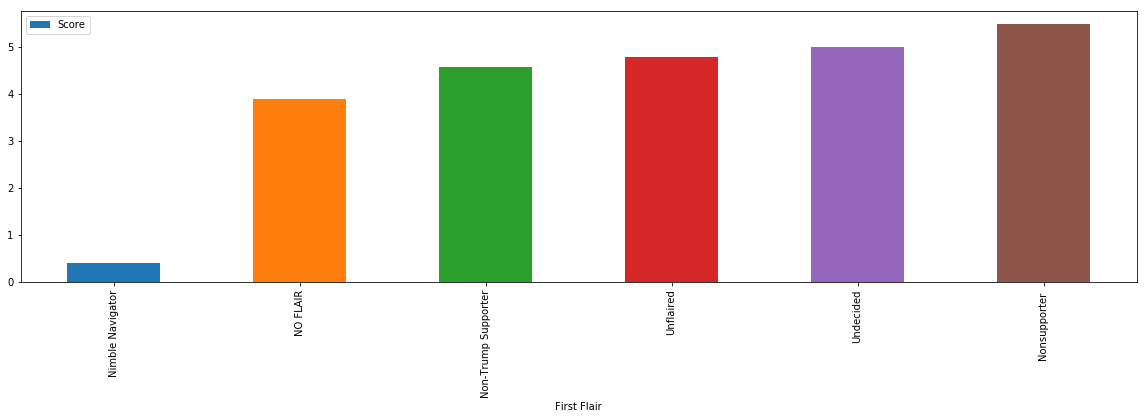

In [47]:
average_score.loc[average_score['Score'] < 10].plot(y='Score', kind='bar',figsize=(20,5))

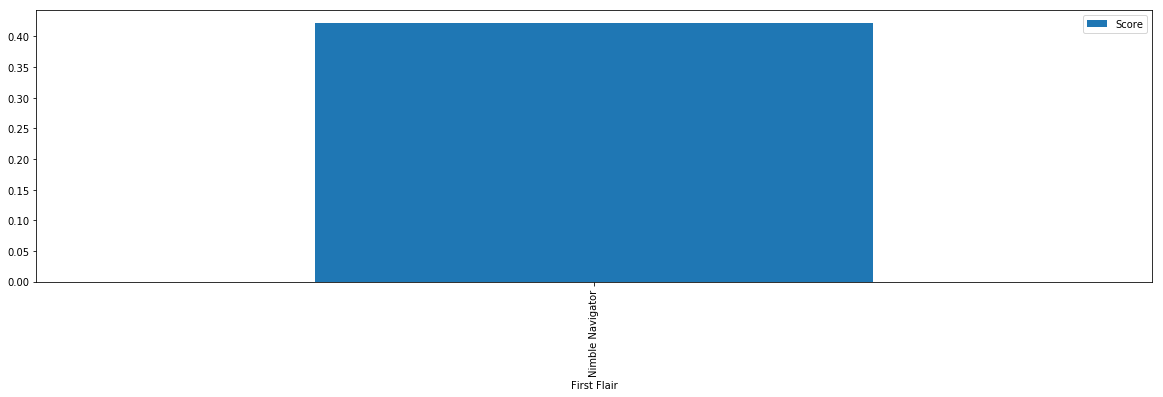

In [45]:
average_score.loc[average_score['Score']< 3].plot(y='Score', kind='bar',figsize=(20,5))